<center>Student Name: Gael Gatera</center>

The code below was made to hide specific input cells and was found on stack overflow (5).

In [103]:
from IPython.core.display import display, HTML
toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Hide Code"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

display(HTML(toggle_code_prepare_str + toggle_code_str))

def Hide_code():
    display(HTML(toggle_code_str))

# Introduction

## Essential Libraries, Tools & Dependencies

Relative importing allows a python file or a Pyhon module to access the script from another Python file or module. The import statement adds the object to the current scope of your program (11).

__Scikit-learn (sklearn):__ Contains a number of state-of-the-art machine learning algorithms that were used throughout this project. Scikit-learn is considered the most prominent Python library for machine learning and depends on two other Python packages, Numpy and SciPy (5).

__OS:__ The OS module in Python provides a way of using operating system dependent functionality. The functions that the OS module provides allows you to interface with the underlying operating system that Python is running on - be that Windows, Mac or Linux (3).

__Pandas:__ This is a Python library for data wrangling and analysis. Pandas provides a great range of methods to modify and operate on this table; in particular, it allows SQL-like queries and joins of tables (5). This library is mainly used in data pre-processing.

__Numpy:__ This is one of the fundamental packages for scientific computing in Python. It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations. In scikit-learn, the Numpy array is the fundamental data structure (5).

__Scipy:__ This is a collection of functions for scientic computing in Python. It provides, among other functionalities, advanced linear algebra routines, mathematical functions, and statistical distributions (5).

__Matplotlib:__ This is considered the primary scientific plotting library in Python. It provides functions for making publication-quality visualizations such as line charts, histograms, scatter plots and so on (5).

__Seaborn:__ This is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. Seaborn aims to make visualization a central part of exploring and understanding data. It's dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantinc mapping and statistical aggregation to produce informative plots (6). Seaborn's functionality include but is not limited to:

  * A dataset-oriented API for examining relationships between multiple variables.

  * Specialized support for using categorical variables to show observations or aggregate statistics.
  
  * Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data.
  
__Itertools:__ Collection of tools for handling iterators. Simply put, iterators are data types that can be used in a for loop. The most common iterator in Python is the list(9).
  
__io module:__ The default interface to access files and streams in Python 3.0 (docs.python.org).

In [105]:
display(HTML(toggle_code_str))

#Importing Dependencies 
import os

import sys
print("Python version: {}".format(sys.version))

# Importing panas 
import pandas as pd
print("Pandas version: {}".format(pd.__version__))

# Importing numpy 
import numpy as np
print("Numpy version: {}".format(np.__version__))

# Importing matplotlib for plotting 
import matplotlib as plt
print("MatplotLib version: {}".format(plt.__version__))

# importing seaborn for plotting 
import seaborn as sns
sns.set_style('whitegrid')
sns.set()
print("Seaborn version: {}".format(sns.__version__))

# Importing warnings to ignore 'errors'
import warnings
warnings.filterwarnings('ignore')
plt.style.use('classic')

# Importing scipy & libraries that we will use  
import scipy as sp
print("Numpy version: {}".format(sp.__version__))
from scipy.stats import skew

# Stats for statistical functions 
from scipy import stats 

#Importing scipy for stats for pearson distribution Skewness and Kurtosis
from scipy.stats.stats import pearsonr

#Importing scipy for stats for normal distribution 
from scipy.stats import norm

# Importing Ipython 
import IPython
print("IPython version: {}".format(IPython.__version__))

# Importing sckitit learn & the decision tree module
import sklearn
print("sklearn version: {}".format(sklearn.__version__))
from sklearn import tree

# Import label encoder
from sklearn.preprocessing import LabelEncoder

Python version: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Pandas version: 0.23.4
Numpy version: 1.15.4
MatplotLib version: 3.0.2
Seaborn version: 0.9.0
Numpy version: 1.1.0
IPython version: 7.2.0
sklearn version: 0.20.1


## Data Pre-Processing
  The pandas library is very helpful with this step of the Data exploration and overall Data Analysis workflow. Pandas allows the user to import the raw csv file and transform it into a Dataframe with which many operations can be done on. The first operation that was done in this case is to use the ".columns" method in order to look at the columns which are relevant to the project. 

In [109]:
display(HTML(toggle_code_str))
USATrendingVideos = pd.read_csv("Data/USvideos.csv")
USATrendingVideos.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

### Dropping Unecessary Columns
The data contains columns such as 'comments_disabled' and 'ratings_disabled' which are set by the actual Youtuber and should not affect whether a video trends or not. This simply means that the Youtuber does not want comments and ratings on their videos. Using columns such as 'description' and 'tags' would be useful for sentiment analysis models, however will not be performed in this project and therefore will be dropped from the dataframe. The columns 'thumbnail_link' and 'video_error_or_removed' are also irrelevent to the project and will also be dropped for faster computation and ease of analysis. 

In [110]:
display(HTML(toggle_code_str))
USATrendingVideos = USATrendingVideos.drop(['comments_disabled','ratings_disabled',
                      'description','tags', 'thumbnail_link', 'video_error_or_removed'], axis= 1)

### First Look

The pandas ".head()" method allows the user to look at the first 5 rows and the column labels. This is very helpful in order to see what kind of Data is being worked with. Also, checking how many values are contained in each column and seeing if there are any missing values can be useful.

In [111]:
display(HTML(toggle_code_str))
#First look at the kind of Data we have
USATrendingVideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,8O-ZUXGcuWU,18.14.06,Nintendo @ E3 2018: Day 2,Nintendo,20,2018-06-14T01:31:53.000,1549110,21905,1516,1318
1,Gi56dSh8Fq8,18.14.06,Gourmet Chef Makes A Big Mac Super Fancy,BuzzFeedVideo,22,2018-06-13T18:00:32.000,402418,10070,3303,2142
2,-9rdDeWzvsU,18.14.06,Stampede - Alexander Jean Ft. Lindsey Stirling,Lindsey Stirling,10,2018-06-13T16:00:24.000,296615,38671,463,2348
3,MrMAfMbZOmg,18.14.06,Troye Sivan - Dance To This (Official Audio) f...,TroyeSivanVEVO,10,2018-06-13T16:00:01.000,1473589,214511,2011,17455
4,JGm9Y_hFqNk,18.14.06,First Take reacts: Kyrie Irving says contract ...,ESPN,17,2018-06-13T15:06:08.000,812832,7701,320,2505


In [112]:
display(HTML(toggle_code_str))
print("Shape of data: {}".format(USATrendingVideos.shape))

Shape of data: (40949, 10)


The good news is that all columns have the same amount of values and there are no missing values. When looking at the "publishing_time" column, we can see that something is not correct. The data contained in the "publish_time" column in reality is a combination of date and time with the character "T" acting as a delimiter. The aformentioned can be kept in mind as a next step for the data preparation to separate the two before turning them into parameters. Furthermore, when we are looking at the "category_id" column, we see that it only contains integers. Altough this is not a bad thing in concept, a proactive analyst can realize that these will eventually be turned into categorical variables and having them labeled would be ideal. Luckily, the zipfile that was downloaded from Kaggle contains a .json file which has each categorical_id number with it's corresponding label.

In [113]:
display(HTML(toggle_code_str))
USATrendingVideos[['publish_date','publish_time']] = USATrendingVideos['publish_time'].str.split('T', expand=True)

In [114]:
display(HTML(toggle_code_str))
# Transforming Trending date column to datetime forma
USATrendingVideos['trending_date'] = pd.to_datetime(USATrendingVideos['trending_date'], format='%y.%d.%m').dt.date

In [115]:
display(HTML(toggle_code_str))
USATrendingVideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date
0,8O-ZUXGcuWU,2018-06-14,Nintendo @ E3 2018: Day 2,Nintendo,20,01:31:53.000,1549110,21905,1516,1318,2018-06-14
1,Gi56dSh8Fq8,2018-06-14,Gourmet Chef Makes A Big Mac Super Fancy,BuzzFeedVideo,22,18:00:32.000,402418,10070,3303,2142,2018-06-13
2,-9rdDeWzvsU,2018-06-14,Stampede - Alexander Jean Ft. Lindsey Stirling,Lindsey Stirling,10,16:00:24.000,296615,38671,463,2348,2018-06-13
3,MrMAfMbZOmg,2018-06-14,Troye Sivan - Dance To This (Official Audio) f...,TroyeSivanVEVO,10,16:00:01.000,1473589,214511,2011,17455,2018-06-13
4,JGm9Y_hFqNk,2018-06-14,First Take reacts: Kyrie Irving says contract ...,ESPN,17,15:06:08.000,812832,7701,320,2505,2018-06-13


### Converting .json file to .csv file

It is very common that when pulling data from an API that the data comes in the form on a .json file. These files are key value pairs just like dictionaries, meaning they can also be made into dataframes. This section converts the US_category_id.json file which contains all the previously mentioned category id's whith the appropriate labels.

In [141]:
display(HTML(toggle_code_str))
# Dependencies
import json
import csv
# Read "category_id" file into a variable and parse it into a JSON object:
#read file
with open('Data/US_category_id.json', 'r') as jsonfile:
    data=jsonfile.read()
 
# parse file
jsonobj = json.loads(data)

In [140]:
display(HTML(toggle_code_str))
'''
Since .json files are like dictionaries as in they are key value pairs. 
We can check if the code we use to convert works fine.
'''
print(jsonobj['items'][3]['id'])

NameError: name 'jsonobj' is not defined

The previous code successfully outputed '15', one of the integers in the 'category_id'. This means we now have our JSON object in memory.  Next step, we need to write our code to convert the JSON into CSV by creating a list of keys in the JSON. Once the .json file was converted into .csv file we can do the same ".head" method that was done on the initial dataframe in order to look at the column labels.

In [139]:
display(HTML(toggle_code_str))
keylist = []
for key in jsonobj['items']:
    keylist.append(key)

NameError: name 'jsonobj' is not defined

In [138]:
display(HTML(toggle_code_str))
'''

f = csv.writer(open("test.csv", "w"))
f.writerow(keylist)

#Iterate through each record in the JSON Array
for record in jsonobj:
Create placeholder to hold the data for the current record
    currentrecord = []
#Iterate through each key in the keylist and add the data to our current record list
for key in keylist:
    currentrecord.append(record[key])

    #Write the current record as a line in our CSV
f.writerow(currentrecord)

'''

'\n\nf = csv.writer(open("test.csv", "w"))\nf.writerow(keylist)\n\n#Iterate through each record in the JSON Array\nfor record in jsonobj:\nCreate placeholder to hold the data for the current record\n    currentrecord = []\n#Iterate through each key in the keylist and add the data to our current record list\nfor key in keylist:\n    currentrecord.append(record[key])\n\n    #Write the current record as a line in our CSV\nf.writerow(currentrecord)\n\n'

In [137]:
display(HTML(toggle_code_str))
CategoryCSV = pd.read_csv("Data/convertcsv.csv")
CategoryCSV.head()

,kind,etag,id,snippet/channelId,snippet/title,snippet/assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


The results above shows the labels for each category id as 'snippet/title'. The next step will be to rename the 'id' column to 'category_id' so it can be merged to the USATrendingVideos dataframe. All the other columns can be dropped as they are not required for the purposes of this project. Furthermore, another step for the data exploration is to count how many categories there are just to keep them in mind.

In [135]:
display(HTML(toggle_code_str))
CategoryCSV = CategoryCSV.rename(columns={'id': 'category_id'})
CategoryCSV = CategoryCSV.rename(columns={'snippet/title': 'category_name'})

In [136]:
display(HTML(toggle_code_str))
print("Shape of data: {}".format(CategoryCSV.shape))

Shape of data: (32, 6)


### Final Data

In [134]:
display(HTML(toggle_code_str))
USATrendingVideos_v2 = pd.merge(USATrendingVideos,CategoryCSV,how="left",on="category_id")

In [142]:
display(HTML(toggle_code_str))
#USATrendingVideos_v2 = USATrendingVideos_v2.drop(['kind','etag',
#                      'snippet/channelId', 'snippet/assignable'], axis= 1)

In [132]:
display(HTML(toggle_code_str))
USATrendingVideos_v2.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date,category_name
0,8O-ZUXGcuWU,2018-06-14,Nintendo @ E3 2018: Day 2,Nintendo,20,01:31:53.000,1549110,21905,1516,1318,2018-06-14,Gaming
1,Gi56dSh8Fq8,2018-06-14,Gourmet Chef Makes A Big Mac Super Fancy,BuzzFeedVideo,22,18:00:32.000,402418,10070,3303,2142,2018-06-13,People & Blogs
2,-9rdDeWzvsU,2018-06-14,Stampede - Alexander Jean Ft. Lindsey Stirling,Lindsey Stirling,10,16:00:24.000,296615,38671,463,2348,2018-06-13,Music
3,MrMAfMbZOmg,2018-06-14,Troye Sivan - Dance To This (Official Audio) f...,TroyeSivanVEVO,10,16:00:01.000,1473589,214511,2011,17455,2018-06-13,Music
4,JGm9Y_hFqNk,2018-06-14,First Take reacts: Kyrie Irving says contract ...,ESPN,17,15:06:08.000,812832,7701,320,2505,2018-06-13,Sports


In [131]:
display(HTML(toggle_code_str))
print("Shape of data: {}".format(USATrendingVideos_v2.shape))

Shape of data: (40949, 12)


The dataset can confuse someone because video can be classified as trending at different time periods after it was first published. Let's take the video title "maybe i could eat blades of grass" by bill wurtz.

# Data Analysis

## Choosing Hyperparameters

Continuing, for this project I will take a closer look and gain better insight at the columns and see which properties of the data can be essential to predicting trending before they are prossed. Before they are processed, these proporties are called hyperparameters in Machine Learning. A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data (Brownlee). On his Machine Learning blogpost, Jason Brownlee gives the following description to hyperparameters: 
* They are required by the model when making predictions. 
* They values define the skill of the model on your problem.
* They are estimated or learned from data.
* They are often not set manually by the practitioner.
* They are often saved as part of the learned model.

In [130]:
display(HTML(toggle_code_str))
EatGrass = USATrendingVideos_v2.loc[USATrendingVideos_v2['title'] == 'maybe i could eat blades of grass']
print(EatGrass[['trending_date', 'title', 'views']])

      trending_date                              title    views
25019    2018-02-06  maybe i could eat blades of grass  1578774
25020    2018-02-05  maybe i could eat blades of grass  1514664
25021    2018-02-04  maybe i could eat blades of grass  1458382
25022    2018-02-03  maybe i could eat blades of grass  1371619
25023    2018-02-02  maybe i could eat blades of grass  1256855
25024    2018-02-01  maybe i could eat blades of grass   996318


The results above imply that a video is inserted into the trending data every 24 hours. In this case, the video called "maybe i could eat blades of grass" was categorized as trending for 6 straight days. In order to grab numerical hyperparameters such as views and likes, all we need to do is group each video by title & video_id then grab the most recent value for the mentioned.

In [129]:
display(HTML(toggle_code_str))
FinalData = USATrendingVideos_v2.drop_duplicates(subset=['title'], keep='first', inplace=False)

In [128]:
display(HTML(toggle_code_str))
print("The final dataset contains {} videos".format(FinalData.shape))

The final dataset contains (6455, 12) videos


In [127]:
display(HTML(toggle_code_str))
# Here we are testing if the final data set contains only the values of the last trending day.
result =  pd.DataFrame(FinalData)
result1 = FinalData.loc[FinalData['title'] == 'maybe i could eat blades of grass']
print(result1[['trending_date', 'title', 'views']])

      trending_date                              title    views
25019    2018-02-06  maybe i could eat blades of grass  1578774


In [126]:
display(HTML(toggle_code_str))
# Comparing the amount of videos for each data set
print("USATrendingVideos version 2 contains {} videos".format(USATrendingVideos_v2.shape[0]))
print("While the final dataset contains {} videos".format(FinalData.shape[0]))

USATrendingVideos version 2 contains 40949 videos
While the final dataset contains 6455 videos


## Correlation Analysis

Below is a correlation heat map for the data that still contained multiple trending dates for each video.

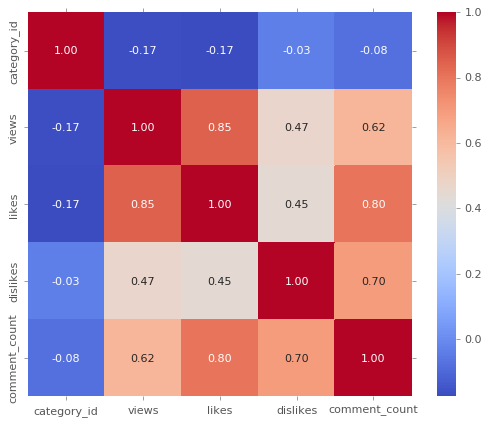

In [125]:
display(HTML(toggle_code_str))
with plt.style.context(('ggplot')):
    sns.heatmap(USATrendingVideos_v2.corr(), 
                cmap='coolwarm',
                cbar=True, annot=True, 
                square=True, fmt='.2f', annot_kws={'size':10})

In [124]:
display(HTML(toggle_code_str))
corr_matrix	=	USATrendingVideos_v2.corr()
corr_matrix["views"].sort_values(ascending=False) 

views            1.000000
likes            0.849177
comment_count    0.617621
dislikes         0.472213
category_id     -0.168231
Name: views, dtype: float64

In [123]:
display(HTML(toggle_code_str))
corr_matrix["likes"].sort_values(ascending=False) 

likes            1.000000
views            0.849177
comment_count    0.803057
dislikes         0.447186
category_id     -0.173921
Name: likes, dtype: float64

Below is a correlation heatmap for the data that had only contained the last trending day for each video.

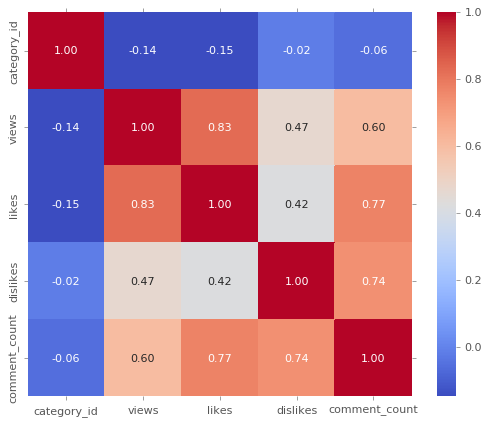

In [122]:
display(HTML(toggle_code_str))
with plt.style.context(('ggplot')):
    sns.heatmap(FinalData.corr(), 
                cmap='coolwarm',
                cbar=True, annot=True, 
                square=True, fmt='.2f', annot_kws={'size':10})

In [121]:
display(HTML(toggle_code_str))
corr_matrix2 = FinalData.corr()
corr_matrix2["views"].sort_values(ascending=False)

views            1.000000
likes            0.832950
comment_count    0.601737
dislikes         0.469462
category_id     -0.144558
Name: views, dtype: float64

In [120]:
display(HTML(toggle_code_str))
corr_matrix2["likes"].sort_values(ascending=False)

likes            1.000000
views            0.832950
comment_count    0.771800
dislikes         0.421522
category_id     -0.147965
Name: likes, dtype: float64

### Comments:
We can see that removing the duplicate values for videos that trended multiple times did not have a huge impact as far as which hyperparameters correlated with the other ones, although the actual values differended slightly it is not much of a concern. For example the correlation between the likes and views went from .85 to .83 which is not a big deal. Furthermore, when looking at the correlation between dislikes and views, the value is at a neutral 0.47 for both datasets. The only conclusion that can be drawn from the two aformentioned numbers is that while a video trends and gets more views, viewers are more likely to like the video that dislike the video. If a viewer actually does not like a video they might simply watch another video and not click on the 'dislike' button. The correlaltions closets to 0 are all related to category_id, implying that the Youtube alorigthm does not lean towards putting a certain category as trending over another. 

### Top 5 Views
The first hyperparameter when thinking about a Youtube video is the amount of views it gets. Here we are getting the videos with the top 5 most views out of all the videos that trended.

In [119]:
display(HTML(toggle_code_str))
# This code groups video_id, title for getting likes of each video at the last day of trending
FinalData.sort_values("views", ascending = False)[['trending_date', 'title', 'views']].head()

,trending_date,title,views
6092,2018-05-31,Childish Gambino - This Is America (Official V...,217750076
35389,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127
3195,2018-05-31,BTS (방탄소년단) 'FAKE LOVE' Official MV,121219886
39179,2017-11-26,"Luis Fonsi, Demi Lovato - Échame La Culpa",102012605
16682,2018-03-25,Maluma - El Préstamo (Official Video),87264467


### Top 5 Liked
The next hyperparameter one would think about for a Youtube videos is the amount of likes. Here we are getting the videos with the top 5 most likes out of all the videos that trended.

In [118]:
display(HTML(toggle_code_str))
# Grouped by video_id for getting likes of each video at the last day of trending
FinalData.sort_values("likes", ascending = False)[['trending_date', 'title', 'likes']].head()

,trending_date,title,likes
3195,2018-05-31,BTS (방탄소년단) 'FAKE LOVE' Official MV,5595203
6092,2018-05-31,Childish Gambino - This Is America (Official V...,4934188
35389,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,3093544
6028,2018-05-16,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,2700800
37706,2017-11-30,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,2674694


### Top 5 Dislikes
On the otherhand if the a video is also being disliked many times it can also be categorized as trending, even if it is for negative reasons. Here we get the videos with the top 5 most dislikes out of all the videos that trended.

In [117]:
display(HTML(toggle_code_str))
# Grouped by video_id for getting likes of each video at the last day of trending
FinalData.sort_values("dislikes", ascending = False)[['trending_date', 'title', 'dislikes']].head()

,trending_date,title,dislikes
30047,2018-01-09,So Sorry.,1674420
35389,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,1643059
26211,2018-01-31,Suicide: Be Here Tomorrow.,487820
6092,2018-05-31,Childish Gambino - This Is America (Official V...,335462
24165,2018-02-09,LOGAN PAUL IS BACK!,291900


### Top 5 Comment Count
The amount of comments a video gets can also have an impact on whether it trends or not. So, here we get the videos with the top 5 most comments out of all the videos that trended.

In [116]:
display(HTML(toggle_code_str))
FinalData.sort_values("comment_count", ascending = False)[['trending_date', 'title', 'comment_count']].head()

,trending_date,title,comment_count
30047,2018-01-09,So Sorry.,1361580
3195,2018-05-31,BTS (방탄소년단) 'FAKE LOVE' Official MV,1225326
35389,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,810698
26211,2018-01-31,Suicide: Be Here Tomorrow.,647524
37706,2017-11-30,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,539309


# Machine Learning

## Training and Testing Data

In order to make sure that the machine learning models don't simply become good at memorizing the the introduced data, the final dataset will have to be split into two : 
    1) Training Data: Used to build the machine learning model.
    2) Testing Data: Used to assess how well the model works.

In [108]:
display(HTML(toggle_code_str))
train_set, test_set = split_train_test(USATrendingFinalData, 0.2)

NameError: name 'split_train_test' is not defined

In [107]:
display(HTML(toggle_code_str))
#video_level['views_ratio'] = FinalData['views'].groupby(level=1).last() / video_level.views

In [106]:
display(HTML(toggle_code_str))
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lars, Ridge


regr_1 = DecisionTreeRegressor(max_depth=2,min_samples_leaf=.01)
regr_2 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=.01)
regr_ols = LinearRegression()
regr_lrs = Lars()
regr_rdg = Ridge (alpha = .5)

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_ols.fit(X_reg, y_reg)
regr_lrs.fit(X_reg, y_reg)
regr_rdg.fit(X_reg, y_reg)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_ols = regr_ols.predict(X_reg)
y_lrs = regr_lrs.predict(X_reg)
y_rdg = regr_rdg.predict(X_reg)

print((y_1 - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('Regression Tree 1: R-sq = {:.2%}'.format(metrics.r2_score(y,y_1)))


print((y_ols - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('OLS: R-sq = {:.2%}'.format(metrics.r2_score(y_reg,y_ols)))



print((y_lrs - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('LARS: R-sq = {:.2%}'.format(metrics.r2_score(y_reg,y_lrs)))



print((y_rdg - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('Ridge Regression: R-sq = {:.2%}'.format(metrics.r2_score(y_reg,y_rdg)))

NameError: name 'X' is not defined

# References
<p> [1] Mitchell Jolly( Data Snaek) (2019). Trending YouTube Video Statistics <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>Daily Statistics for Trending Youtube Videos,</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://www.kaggle.com/datasnaek/youtube-new </p>

<p> [2] Mitchell Jolly & Data Snaek (2019). Trending YouTube Video Scraper <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>Python script that scrapes the currently trending YouTube videos in a variety of countries,</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://github.com/DataSnaek/Trending-YouTube-Scraper </p>

<p> [3] Author Unknown (2013). Python For Beginners <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>Python's OS Module,</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://www.pythonforbeginners.com/os/pythons-os-module </p>

<p> [4] Shubham. Ranjan (2019). Geeks For Geeks <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>Python | Pandas dataframe.ffill(),</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/ </p>

<p> [5] Andreas C. Muller & Sarah Guido (2013). Introduction to Machine Learning with Python:<br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>A guide for Data Scientists.,</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://www.pythonforbeginners.com/os/pythons-os-module </p>

<p> [6] Michael Waskom (2012-2018). Seaborn <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>An Introduction to Seaborn</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://seaborn.pydata.org/introduction.html#introduction </p>

<p> [7] Author Unknown . scikit-learn <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>5.9. Transforming the prediction target (y),</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets </p>

<p> [8] Author Unknown . ipython.readthedocs.io <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>Rich Outputs,</i> Retrieved from:<br> 
&nbsp;&nbsp;&nbsp;&nbsp; https://ipython.readthedocs.io/en/stable/interactive/plotting.html </p>

<p> [9] Jason Ridgen (2017) Medium <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i> A guide to itertools,</i> Retrieved from:<br> 
&nbsp;&nbsp;&nbsp;&nbsp; https://medium.com/@jasonrigden/a-guide-to-python-itertools-82e5a306cdf8 </p>

<p> [10] Author Unknown (2019) docs.python.org <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i> A guide to itertools,</i> Retrieved from:<br> 
&nbsp;&nbsp;&nbsp;&nbsp; https://docs.python.org/2/library/io.html</p>

<p> [11] Guest Contributor (2019) docs.python.org <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i> Relative vs Absolute Imports in Python,</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp; https://stackabuse.com/relative-vs-absolute-imports-in-python/</p>